## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [33]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [34]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [35]:
no_of_rows = df.shape[0]
no_of_rows

294478

c. The number of unique users in the dataset.

In [36]:
unique = df['user_id'].unique()
len(unique)

290584

d. The proportion of users converted.

In [37]:
len(df[df['converted']== 1])/ len(df['user_id']) * 100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [38]:
len(df[(df['group'] == 'treatment') != (df['landing_page'] == 'new_page')])

3893

f. Do any of the rows have missing values?

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [40]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) & ((df['group'] == 'control') == (df['landing_page'] == 'old_page'))]

In [41]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [42]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [43]:
duplicate = df2[df2['user_id'].duplicated()]
print ("The user id is: ", duplicate['user_id'])

The user id is:  2893    773192
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [44]:
print ( "The row information is given below:")
duplicate

The row information is given below:


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [45]:
df2 = df2[df2.timestamp != '2017-01-14 02:55:59.590927']

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [46]:
converted = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print ("probability of the individual converted regardless of the page: ", converted)

probability of the individual converted regardless of the page:  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [47]:
control_grp = df2.query('group == "control"')
control_grp_prop = len(control_grp.query('converted == 1'))/len(control_grp)
print ("probablility of the control group converted: ", control_grp_prop)

probablility of the control group converted:  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [48]:
treatment_grp = df2.query('group == "treatment"')
treatment_grp_prop = len(treatment_grp.query('converted == 1'))/len(treatment_grp)
print ("probablility of the treatment group converted: ", treatment_grp_prop)

probablility of the treatment group converted:  0.11880806551510564


d. What is the probability that an individual received the new page?

In [82]:
landing_new_page = len(df2[df2['landing_page'] == 'new_page'])/len(df2)
obs_diff = treatment_grp_prop - control_grp_prop 
print ("probability that an individual received the new page: ",landing_new_page) 
print ("observation difference: ", obs_diff)

probability that an individual received the new page:  0.5000619442226688
observation difference:  -0.0015782389853555567


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The new_page has a percentage of 50% and the old_page has a percentage of 49%, so both the landing page are sharing nearly the evident of same conversion rate. So, that the $p_{new}$ and $p_{old}$ shares the equal rate of converted success rate regardless of the page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

No, we should not stop as soon as one page is considered as better than the other, we have to test the entire data, or we have to do bootsampling of diffrent levels says from 200 to 10000, to get a better understanding of the hypothesis and to deliever a solution.


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:** In null hypothesis the old page is considered to be better or equal to the new page (new <= old) <br/>
**Alternative Hypothesis:** In the alternate hypothesis it is assumed that the new_page is better than the old page (new > old) .

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [50]:
p_new = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print (p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [51]:
p_old = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print (p_old)

0.11959708724499628


c. What is $n_{new}$?

In [52]:
n_new = len(df2[df2['landing_page'] == 'new_page'])
n_new

145310

d. What is $n_{old}$?

In [53]:
n_old = len(df2[df2['landing_page'] == 'old_page'])
print (n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [54]:
#new_page_converted = df2[df2['landing_page'] == 'new_page']
new_page_converted = np.random.binomial(n_new,p_new,10000)/n_new
print (new_page_converted)

[ 0.11960636  0.11904205  0.11905581 ...,  0.11889753  0.11954442
  0.11906958]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [55]:
#old_page_converted = df2[df2['landing_page'] == 'old_page']
old_page_converted = np.random.binomial(n_old,p_old,10000)/n_old
print (old_page_converted)

[ 0.12052398  0.11883062  0.11965665 ...,  0.12043449  0.11928494
  0.11933312]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [56]:
p_diffs = new_page_converted - old_page_converted
p_diffs

array([-0.00091762,  0.00021142, -0.00060084, ..., -0.00153696,
        0.00025948, -0.00026355])

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [77]:
p_diffs = []
for _ in range(10000) :
    #bootsample = df2.sample(200, replace= True)
    #a= bootsample[(bootsample['landing_page'] == 'new_page') & (bootsample['converted'] == 1)]
    #b= bootsample[(bootsample['landing_page'] == 'old_page') & (bootsample['converted'] == 1)]
    new_page_converted = np.random.binomial(n_new,p_new,1)/n_new
    old_page_converted = np.random.binomial(n_old,p_old,1)/n_old
    p_diffs.append(new_page_converted - old_page_converted)     

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

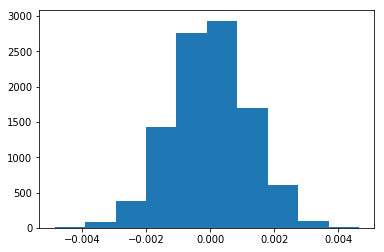

In [78]:
p_diffs = np.array(p_diffs)
#Sampling Distribution
plt.hist(p_diffs);

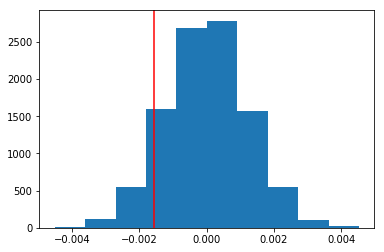

In [83]:
#Distribution under null hypothesis
null_values = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist( null_values)
plt.axvline(obs_diff, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [85]:
p_values = (p_diffs > obs_diff).mean()
p_values

0.90439999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

It has computed p_diffs(difference in the converted between the two pages) for the 10,000 boot sampling, and have given the proportion of the p_diffs(**The p-value**) greater than the actual difference observed from the actual dataset. So from this it is clear that the p_value is greater than the threshold value(0.05 or 5%) and hence we have failed to reject the null hypothesis (H0) and there is no significant difference between the page and converted.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [87]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])
n_old = len(df2[df2['landing_page'] == 'old_page'])
n_new = len(df2[df2['landing_page'] == 'new_page'])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [88]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
print (z_score , p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Yes, From the calculation of the Z_score and the P_value it is clear that the p_value is greater than the thershold value 0.05 and it have failed to reject the null hypothesis (H0), and it is agreed with the previous finding using the bootsampling for 10000 datas saying there is no significant difference.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

So here the independent variable is more and our dependent variable is 0's or 1's, so ultimatly we have to use the logistic regression to fit the model and predict the dependent variable "Converted" or not.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [89]:
#df3 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) & ((df['group'] == 'control') == (df['converted'] == 0))]
df3 = df2.copy()
df4 = df3[['converted']]
df4['intercept'] = 1 
dummy = pd.get_dummies(df3['landing_page'], prefix = 'ab_page')
#dummy.head()
df4 = df4.join(dummy)
df4.head()

/home/hitesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,converted,intercept,ab_page_new_page,ab_page_old_page
0,0,1,0,1
1,0,1,0,1
2,0,1,1,0
3,0,1,1,0
4,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [90]:
import statsmodels.api as sm
model = sm.OLS(df4['converted'],df4[['intercept','ab_page_new_page']])
result = model.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [91]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Thu, 14 Dec 2017   Prob (F-statistic):              0.190
Time:                        19:04:22   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.1204      0.001    141.407      0.000       0.119       0.122
ab_page_new_page    -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The P_value associated with the ab_page in terms of landing_page and converted is 0.190 which is higher than the thershold value 0.05 so we failed to reject the null hypothesis. The resulting Part III tells that there is no significant difference in conversion between the treatment and control groups. While comapring it with part II p_value, the p_value for part II is 0.905 where as for part III is 0.190 which has a wide difference with the alternate hypothesis and another reason for it's difference with part II is that logistic regression is two-sided where as the part II is one-sided.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Considering other factors can give you better idea of landing page, where to go with the null hypothesis or to take the alternative, at the same time if we keed adding new factors to our regression model which might let to a over fitting of regression model, so we have to be precise in considering other factors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [92]:
# Read the countries csv file
df_country = pd.read_csv('countries.csv')
# Merged with the existing dataset having user_id as index
df_join = df2.set_index('user_id').join(df_country.set_index('user_id'))
# Took only the required columns
df5 = df_join[['converted']]
# Creating intercept with default value of 1
df5['intercept'] = 1 
# Created dummies for the country variable
dummy = pd.get_dummies(df_join['country'])
# Joined dummies with the df5 and stored it in to new variable df_new 
df_new = df5.join(dummy)

/home/hitesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [93]:
# Fitting the regression model
model = sm.OLS(df_new['converted'],df_new[['intercept','UK','US']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Thu, 14 Dec 2017   Prob (F-statistic):              0.201
Time:                        19:04:30   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
UK             0.0053      0.003      1.787      0.074      -0.001       0.011
US             0.0042      0.003      1.516      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the regression model summary using the country columns, Uk has a P_vaue of 0.074 which is higher than the threshold value of 0.05, so we failed to reject the null hypothesis ($H{o}$) and there is no significant difference betweent the page and the UK Country , similarly for US, the P_value is 0.130 which is again higher than the thershold value (0.05) and it also failed to reject the null hypothesis ($H{o}$) and there is no significant difference between the page and the US Country. </n>
Hence, both the county has no siginificant difference with the page. 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.